In [31]:
library(datateachr)
library(cowplot)
library(infer)
library(knitr)
library(tidyverse)
library(broom)
library(palmerpenguins)


![](img/scenarios.png)

### Questions

### Question 1
> benefits of simulation-based methods:

two large benefits of simulation-based methods over theory-based methods are that 
- (1) they are easier for people new to statistical inference to understand and 
- (2) they also work in situations where theory-based methods and mathematical formulas don’t exist.

### Question 2
> how ` confidence interval` estimation is performed when using methods that assume normality or the central limit theorem, compared to simulation-based approach (e.g., bootstrapping).

- simulation-based method:    
    - one sample -> 
    - bootstrapping -> 
    - generate many samples -> 
    - take mean of each -> 
    - bootstrap distribution -> 
    - percentile method -> 
    - confidence interval

- theory-based method that assumes normality or CLT:  
using mathematical shortcuts to calculate the plausible range instead of just reading the values off the bootstrap distribution
    - one sample -> 
    - generating/approximating the sampling distribution of a sample estimate using the standard normal -> 
    - sample estimate $\mu$ (point estimate) -> 
    - $\sigma = \frac{\text{sample deviation}} {\text{sample size}}$   -> 
    - approximating the sampling distribution ->
    - use the percentile method to get the confidence interval upper and lower bounds

# Lecture 5  CI
# Confidence intervals based on the assumption of normality or CLT (Central Limit Theorem)

## 1. Summary

#### 1.1 CLT Conditions
> **CLT:** *The central limit theorem states that if you have a population with mean μ and standard deviation σ and take sufficiently large random samples from the population with replacement, then the distribution of the sample means will be approximately normally distributed.*    
> *for large sample sizes the sampling distribution of the sample mean will be approximately normal, regardless of the distribution from which we are sampling. That is the gist of the central limit theorem*    
> - the observations must be independent
> - the sample size must be suﬃciently large    
> THEN    
> - the average of your sample means will be the population mean

For all types of sample statistics:
- **Independence**

For **sample proportions**:
- the sample size must be sufficiently **large** (such that $np ≥ 10$ and $n(1 − p) ≥ 10$)

For **sample means**:  (Normality)
- n < 30:    
If the sample size n is less than 30 and there are no clear outliers in the data, then we typically assume the data come from a nearly normal distribution to satisfy the condition.   
- n ≥ 30:   
If the sample size n is at least 30 and there are no particularly extreme outliers, then we typically assume the sampling distribution of sample mean is nearly normal, even if the underlying distribution of individual observations is not.

#### 1.2. sampling distribution   
If CLT conditions are met
- be normally distributed   
- have a mean equal to the population parameter   
- have SE proportional to the inverse of the square root of the sample size

#### 1.3. CLT Application
(if necessary conditions are met)
- **estimation**    
use the CLT to calculate the **confidence interval** of the parameter of interest (e.g., mean, proportion)   
- **hypothesis testing**    
calculate the **test statistic**, number of standard errors away from the null 
value the observed sample statistic is (Z for proportions, T for means)

#### 1.4. standard error ($SE$)
$$SE = \frac{\hat{\sigma}}{\sqrt{n}}$$
- $\sigma$   
the population standard deviation, but we don't have it, so we "plug-in" $\hat{\sigma}$ instead

- $n$  
the number of observations in our sample

*What we have observed via simulation can also be shown/proven mathematically.*

- for proportions  
$$SE = \sqrt{\frac{\hat{p} (1-\hat{p})}{n}}$$

#### 1.5. CI

**1. Why confidence intervals?**  
- We generate confidence intervals when we only have one sample from which to derive an estimate of the population parameter we are interested in estimating.   
- We know that our estimate will probably not perfectly match the value of population parameter we are interested in estimating, so confidence intervals let us provide a range where we are fairly confident that the population parameter value should lie. To do this, we need the sampling distribution of the sample estimates, or an approximation of one.

**2. How?** - mathematically defined distribution  
- $Z \sim N(mean = 0, \sigma = 1)$  
generating/approximating the sampling distribution of a sample estimate using the standard normal (or $Z$ distribution) 

- $\mu$  
$point\; estimate$ (best guess of the population parameter)

- $\sigma$  
our sample's standard deviation divided by the square root of our sample size

- CI    
then we could use the percentile method to get the confidence interval upper and lower bounds
$$ \, confidence \, interval \, = \, point \, estimate \, \pm  \, Z \, * \, SE$$

#### **1.6. CLT VS Simulation-based approach**

![](img/clt_simu.png)

#### 1.7 t-distribution

**1. Introduction**

When we do inference using the Central Limit Theorem we required a large sample for two reasons:
1) The sampling distribution of $\bar{x}$ tends to be closer to normal when the sample size is large.   
2) The calculated standard error is typically very accurate when using a large sample.


- So what should we do when the sample size is small? If the population data are nearly normal, then $\bar{x}$ will also follow a normal distribution, which addresses the first problem. The accuracy of the standard error is trickier, and for this challenge we’ll introduce a new distribution called the t-distribution. 

- In practice, we cannot directly calculate the standard error for $\bar{x}$ since we do not know the population standard deviation, $\sigma$. We encountered a similar issue when computing the standard error for a sample proportion, which relied on the population proportion, p. Our solution in the proportion context was to use sample value in place of the population value when computing the standard error. We’ll employ a similar strategy for computing the standard error of $\bar{x}$, using the sample standard deviation s in place of $\sigma$:
$$SE = \frac{\hat{\sigma}}{\sqrt{n}} \approx \frac{\text{s (population sd)}}{\sqrt{n}}$$


**2. When to use t-distribution:**  
> - **when our estimate of the standard error is not accurate**
> - **when sample size is small**

- A t-distribution, has a bell shape. However, its tails are thicker than the normal distribution. This means observations are more likely to fall beyond two standard deviations from the mean than under the normal distribution. While our estimate of the standard error will be a little less accurate when we are analyzing a small data set, these **extra thick tails of the t-distribution are exactly the correction** we need to resolve the problem of a poorly estimated standard error.   
- The t-distribution, always centered at zero, has a single parameter: `degrees of freedom`          
The degrees of freedom (`df`) describe the precise form of the bell-shaped t-distribution. When there are more degrees of freedom, the t-distribution looks very much like the standard normal distribution



**3. Critical value `qt`**
> the critical values for a 95% confidence interval formula for a t-distribution when you have 50 observations $t^*_{50}$

```R
tstar_95_df_50 <- qt(0.025, 49) %>% 
    abs() %>% 
    round(2)

tstar_95_df_50
2.01
```

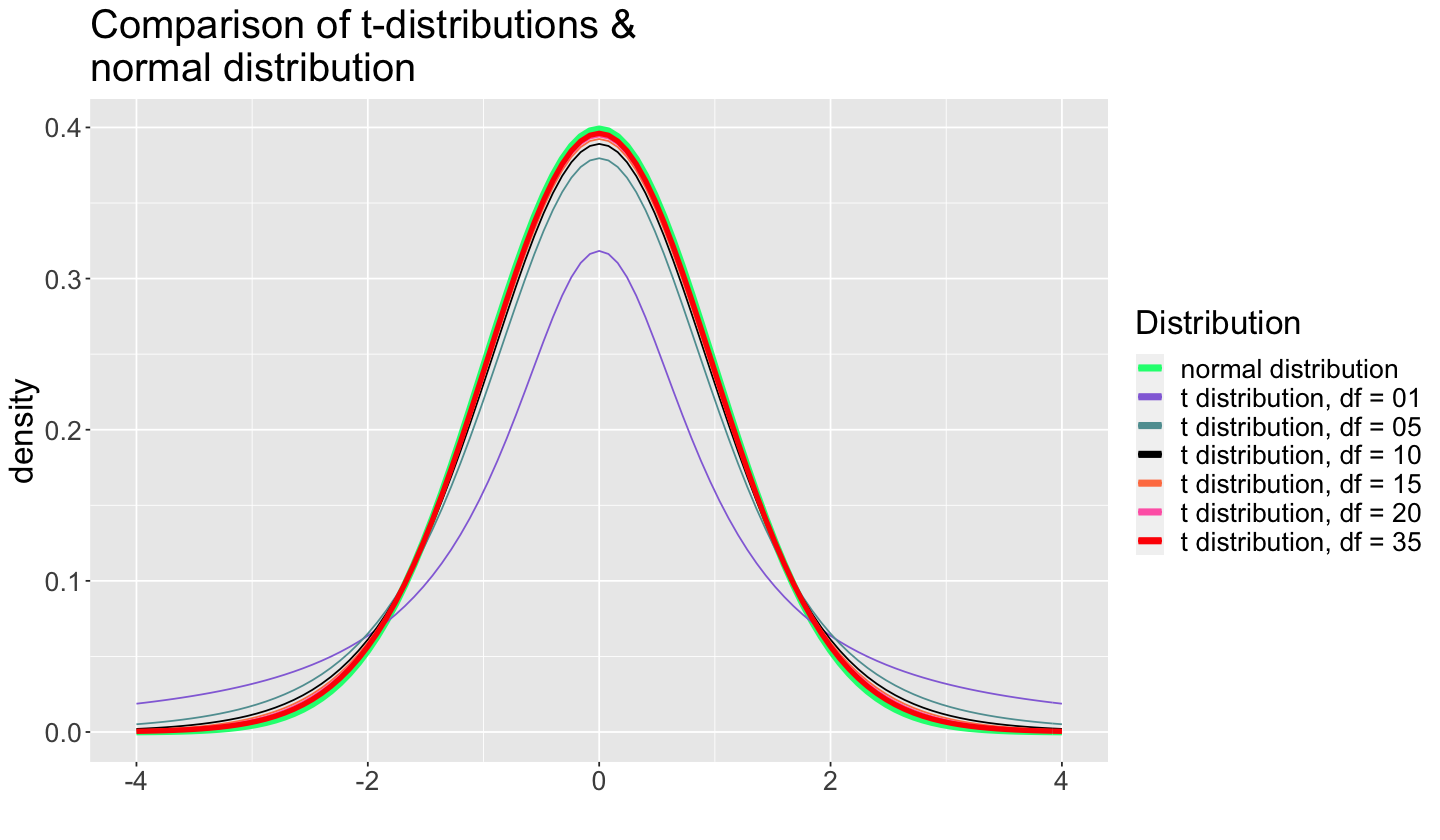

In [32]:
options(repr.plot.width = 12, repr.plot.height = 7)

(p_dists <- ggplot(data = data.frame(x = c(-4, 4)), aes(x)) +
  stat_function(fun = dnorm, n = 101, args = list(mean = 0, sd = 1), aes(colour = "normal distribution"), size = 2) + 
  stat_function(fun = dt, n = 101, args = list(df = 1), aes(colour = "t distribution, df = 01"))  +
  stat_function(fun = dt, n = 101, args = list(df = 5), aes(colour = "t distribution, df = 05"))  +
  stat_function(fun = dt, n = 101, args = list(df = 10), aes(colour = "t distribution, df = 10"))  +
  stat_function(fun = dt, n = 101, args = list(df = 15), aes(colour = "t distribution, df = 15"))  +
  stat_function(fun = dt, n = 101, args = list(df = 20), aes(colour = "t distribution, df = 20"))  +
  stat_function(fun = dt, n = 101, args = list(df = 35), aes(colour = "t distribution, df = 35"), size=1.5) +
  scale_colour_manual("Distribution", values = c("SpringGreen", "MediumPurple", "CadetBlue", 
                                                 "black", "Coral", "HotPink", "red")) +
  ylab("density") +
  xlab("") +
  ggtitle("Comparison of t-distributions & \nnormal distribution")) +
  theme(text = element_text(size=20))

In [33]:
click_through <- read_csv("data/click_through.csv")


── Column specification ────────────────────────────────────────────────────────
cols(
  webpage = col_character(),
  click_target = col_double()
)




In [34]:
# get sample estimates, n's and standard errors
click_through_est <- click_through %>%
  group_by(webpage) %>%
  summarize(
    click_rate = sum(click_target) / n(),
    n = n()
  ) %>%
  mutate(se = sqrt(click_rate * (1 - click_rate) / n))

click_through_ci <- click_through_est %>%
  mutate(
    lower_95 = click_rate - (qnorm(0.975) * se),
    upper_95 = click_rate + (qnorm(0.975) * se)
  )

click_through_ci

`summarise()` ungrouping output (override with `.groups` argument)



webpage,click_rate,n,se,lower_95,upper_95
<chr>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
Interact,0.02847709,2423,0.003379074,0.02185423,0.03509996
Services,0.04849885,1299,0.005960268,0.03681693,0.06018076


## 2. `z-distribution` Example

> estimate the proportion of Gentoo penguins whose nest was observed to contain a full clutch, i.e., 2 eggs. You can use the Yes/No data in the `Clutch Completion` column to do this.

In [35]:
# critical value
quantile_1 <- qnorm(0.005)
quantile_99 <- qnorm(0.995)

z_99 <- abs(quantile_1) %>% 
    round(2)

# CI
estimates <- penguins_raw %>% 
    filter(Species == "Gentoo penguin (Pygoscelis papua)") %>% 
    rename(clutch_completion = `Clutch Completion`) %>% 
    select(Species, clutch_completion) %>% 
    summarise(proportion = sum(clutch_completion == "Yes") / n(),
              se = sqrt(proportion * (1 - proportion) / n()),
              lower = proportion - z_99 * se,
              upper = proportion + z_99 * se)

estimates

proportion,se,lower,upper
<dbl>,<dbl>,<dbl>,<dbl>
0.9354839,0.02206183,0.8785644,0.9924034


## 3. `t-distribution` example


> estimate the mean heights of the teacup giraffes from each island. 

- Hint 1: The equation to calculate 95% confidence intervals using asymptotic theory with a t-distribution is: $$\text{ confidence interval } = \text{point estimate } \pm  \, t^*_{df} \, * \, SE$$

- Hint 2: The degrees of freedom, $df$, is calculated by 
$$df = n - 1$$
(where $n$ is the number of observations per group, here island)

- Hint 3: The standard error, $SE$, is calculated by 
$$\frac{s}{\sqrt{n}}$$
where $s$ is the sample standard deviation. In R you can use `sd` to calculate that. 

In [63]:
height_estimates <- read_csv("data/teacup_giraffes.csv") %>% 
    group_by(island) %>% 
    summarise(mean = mean(height),
             sd = sd(height),
             se = sd / sqrt(n()),
             t_star = round(abs(qt(0.025, n() - 1)), 2),
             lower = mean - t_star * se,
             upper = mean + t_star * se)

height_estimates


── Column specification ────────────────────────────────────────────────────────
cols(
  height = col_double(),
  island = col_character()
)


`summarise()` ungrouping output (override with `.groups` argument)



island,mean,sd,se,t_star,lower,upper
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Island #1,9.86576,1.618670,0.2289145,2.01,9.405642,10.32588
Island #2,17.91862,1.178544,0.1666713,2.01,17.583607,18.25363


# Lecture 6 Hypothesis Test
# Hypothesis tests based on normal and t-distributions

## 1. Summary

#### 1.1. Normal distribution VS T-distribution

1) Specify our hypotheses with respect to the question we are asking   
2) the distribution of the null hypothesis is a **probability distribution**
- **normal distribution**    
when we are testing for a difference in proportions
- **t-distribution**  
when we are testing for a difference in means.

> the **variance** of from the data is not represented in the distribution we use as the model of the null hypothesis, so instead it is represented in the **test statistic**.

#### 1.2 z-test (normal distribution)
> $Z$ test statistic for differences of two proportions ($Z$ score)

$$Z = \frac{\hat{p_1} - \hat{p_2}}{\sqrt{\hat{p} (1 - \hat{p})(\frac{1}{n_1} + \frac{1}{n_2})}}$$
> where $\hat{p}$ is the proportions of the successes combined: 

$$\hat{p} = \frac{Y_1 + Y_2}{n_1 + n_2}$$


- numerator encodes your two sample statistics - the effect size (difference in proportions).  
large effect (difference in proportion) -> larger $Z$ test statistic
- dominator encodes the standard errors of the two samples (reflecting the sample size and sample variability).   
a small standard error (driven by a large sample size and/or small sample variation) -> larger $Z$ test statistic


- $Z$ critical value    
    - the measure of how many deviations in data points deviate from the mean
    - the number of standard deviations from the mean
```R
qnorm(0.025) # -1.95996398454005
qnorm(0.975) # 1.95996398454005
```

#### 1.2 t-test 
> $t$ test statistic for difference of two means ($t$ score)

$$t=\frac{\hat{\mu}_\text{island #1} -\hat{\mu}_\text{island #2} } {s_p\sqrt{\frac{1}{n_1} + \frac{1}{n_2}}}$$


$$s_p^2 =  \frac{s_{1}^2(n_1 - 1) + s_{2}^2(n_2 - 1)} {(n_1 - 1) + (n_2 - 1)}   $$


- $t$'s numerator   
represents the observed effect
- $t$'s denominator    
represents the standard error of the sampling distribution of the two-sample difference in means for the sample size we collected.

- $s_p$   
is the pooled sample standard deviations and $n$ is the total number of observations.
    - $s$ is the sample standard deviation ($s_1$ for sample 1, and $s_2$ for sample 2)
    - $n$ is the number of observations ($n_1$ for sample 1, and $n_2$ for sample 2)


- $t$ critical value  
> the critical values for a 95% confidence interval formula for a t-distribution when you have 50 observations $t^*_{50}$

```R
tstar_95_df_50 <- qt(0.025, 49) %>% 
    abs() %>% 
    round(2)

tstar_95_df_50
2.01
```

- when to use t-test
> - **when the population variance $\sigma$ is unknown**
> - **when sample size is small**

#### 1.3 What affect p-value?


**1. simulation based approach:**


<img src="https://d33wubrfki0l68.cloudfront.net/c13657f5339f170a007f29a840739e0e10d55b32/a275c/images/ht.png" alt="drawing" width="400"/>

-   Effect size (e.g., difference in proportions, difference in means)

    -   Encoded in the test statistic.

    -   A **bigger effect** leads to a bigger test statistic, which holding all else equal, will lead to a **smaller p-value**. The converse is true for a smaller effect.

-   Population variance

    -   Encoded in the distribution of the test statistic under the null hypothesis.

    -   A **bigger variance** leads to a wider distribution of the test statistic under the null hypothesis, which holding all else equal, will lead to a **larger p-value**. The converse is true for a smaller variance.

-   Sample size

    -   Encoded in the distribution of the test statistic under the null hypothesis.

    -   A **bigger sample size** leads to a narrower distribution of the test statistic under the null hypothesis, which holding all else equal, will lead to a **smaller p-value**. The converse is true for a smaller sample size.
    
    

**2. simulation based approach:**

<img src="img/classical-test-framework.png" alt="drawing" width="400"/>


-   Effect size (e.g., difference in proportions, difference in means)

    -   Encoded in the numerator of the test statistic.

    -   A **bigger effect** leads to a bigger test statistic, which holding all else equal, will lead to a **smaller p-value**. The converse is true for a smaller effect.

-   Population variance

    -   Encoded in the standard error, which is in the denominator of the test statistic.

    -   A **bigger variance** leads to a smaller test statistic, which holding all else equal, will lead to a **larger p-value**. The converse is true for a smaller variance.

-   Sample size

    -   Encoded in the standard error, which is in the denominator of the test statistic.

    -   A **bigger sample size** leads to a larger test statistic under the null hypothesis, which holding all else equal, will lead to a **smaller p-value**. The converse is true for a smaller sample size.

#### 1.4 One-tail VS two-tails
- Cons of One tail:
    - suffer the consequences of missing an effect in the opposite direction) the the alternative hypothesis
    - If there was a true effect in the opposite direction (the frequency of developing skin cancer was higher for those who wore sunscreen) we would miss it

## 2. `z-test` example

### Example 1

> estimate the differences between click rates/proportions for two web designs

$H_0$: The click through rate for the Interact version of the website is the same as the click through rate for the Services version of the website ($p_{Interact} = p_{Services}$)

$H_A$: The click through rate for the Interact version of the website is different from the click through rate for the Services version of the website ($p_{Interact} \ne p_{Services}$)

### 2.1. Manually

**1) calculate $\hat{p}_{services}$ and $n_{services}$:**

In [37]:
p_services <- click_through %>% 
    filter(webpage == "Services") %>% 
    summarize(click_rate = sum(click_target) / n()) %>% 
    pull()

n_services <- click_through %>% 
    filter(webpage == "Services") %>%
    nrow()

**2) calculate $\hat{p}_{interact}$ and $n_{interact}$:**

In [38]:
p_interact <- click_through %>% 
    filter(webpage == "Interact") %>% 
    summarize(click_rate = sum(click_target) / n()) %>% 
    pull()

n_interact <- click_through %>% 
    filter(webpage == "Interact") %>%
    nrow()

**3) calculate $\hat{p}$ (the proportions of the successes combined):**

$$\hat{p} = \frac{Y_1 + Y_2}{n_1 + n_2}$$

In [39]:
phat <- click_through %>% 
    summarise(phat = sum(click_target) / n()) %>% 
    pull()

**4) calculate Z, our test statistic:**

$$Z = \frac{\hat{p_1} - \hat{p_2}}{\sqrt{\hat{p} (1 - \hat{p})(\frac{1}{n_1} + \frac{1}{n_2})}}$$

In [40]:
z <- ((p_services - p_interact) / (sqrt(phat * (1 - phat) * (1/n_services + 1/n_interact))))

**5) Where is our threshold for rejecting $H_0$ on this distribution?**
- the standard normal distribution
$$Z \sim N(mean = 0, \sigma = 1)$$

In [41]:
z_norm <- ggplot(data = data.frame(x = c(-4, 4)), aes(x)) +
  stat_function(fun = dnorm, n = 101, args = list(mean = 0, sd = 1)) +
  ylab("") + xlab("") + 
  theme(text = element_text(size=20)) +
  geom_vline(xintercept = c(qnorm(0.025), qnorm(0.975)), 
                     color = "blue", lty = 2)

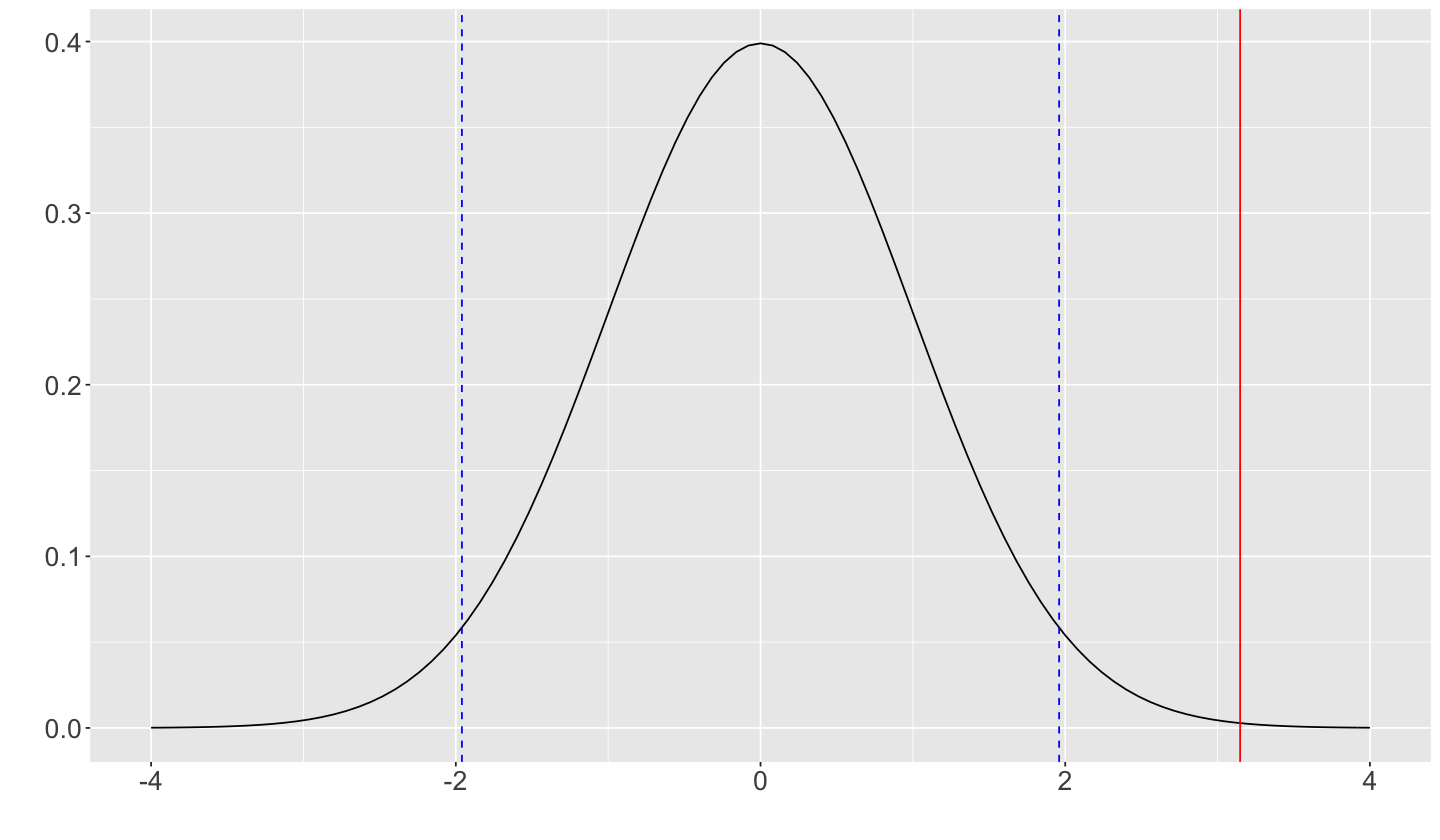

In [42]:
z_norm_with_test_stat <- z_norm +
    geom_vline(xintercept = z, color = "red")
z_norm_with_test_stat

**6)  p-value**

In [43]:
p_value <- pnorm(- abs(z)) + 
    pnorm(abs(z), lower.tail = FALSE)

p_value

[1] 0.001643811

### 2.2. `prop.test`

In [44]:
# calculate success number and n
click_summary <- click_through %>% 
    group_by(webpage) %>% 
    summarize(success = sum(click_target),
             n = n())
click_summary

`summarise()` ungrouping output (override with `.groups` argument)



webpage,success,n
<chr>,<dbl>,<int>
Interact,69,2423
Services,63,1299


In [45]:
result <- prop.test(click_summary$success, 
                    click_summary$n, 
                    correct = FALSE, 
                    alternative = c("two.sided")) %>% 
    tidy()


result

estimate1,estimate2,statistic,p.value,parameter,conf.low,conf.high,method,alternative
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
0.02847709,0.04849885,9.910023,0.001643811,1,-0.03345043,-0.006593075,2-sample test for equality of proportions without continuity correction,two.sided


In [67]:
clinical_trial <- tibble(infections = c(13, 194), 
                         subjects = c(1302, 1393), 
                         treatment = c("vaccine", "placebo"))

prop.test(clinical_trial$infections, 
        clinical_trial$subjects,
        correct = FALSE,
        alternative = c("two.sided")) %>% 
tidy()

# clinical_trial

estimate1,estimate2,statistic,p.value,parameter,conf.low,conf.high,method,alternative
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
0.009984639,0.1392678,158.6295,2.254769e-36,1,-0.1482498,-0.1103164,2-sample test for equality of proportions without continuity correction,two.sided


### Example 2

> estimate the proportion of chocolate timbits

In [46]:
# virtual population with 70% chocalate
set.seed(2020)
virtual_population <- tibble(
  timbit_id = seq(from = 1, to = 1000000, by = 1),
  color = factor(rbinom(1000000, 1, 0.7),
    labels = c("old fashioned", "chocolate")
  )
)


# single sample
single_sample <- rep_sample_n(virtual_population, size = 100)

# summary
summary_single_sample <- single_sample %>%
  group_by(color) %>%
  summarize(n = n())

# p_value
p_value <- prop.test(
  x = summary_single_sample$n[2],
  n = nrow(single_sample), 
  p = 0.7,
  alternative = "two.sided"
) %>% 
tidy()

p_value

`summarise()` ungrouping output (override with `.groups` argument)



estimate,statistic,p.value,parameter,conf.low,conf.high,method,alternative
<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<chr>,<chr>
0.74,0.5833333,0.4450087,1,0.6409778,0.8202573,1-sample proportions test with continuity correction,two.sided


### Example 3

> estimate the proportion of vote for each part

In [62]:
poll_data <- read_csv("data/angus_reid_poll.csv") %>% 
   mutate(party = as.factor(party))

poll_summary <- poll_data %>% 
  group_by(party) %>% 
  summarise(n = n(),
            prop = n / nrow(poll_data)) %>% 
  mutate(se = sqrt(prop * (1 - prop) / nrow(poll_data)),
         lower_ci = prop - (qnorm(0.975) * se),
         upper_ci = prop + (qnorm(0.975) * se))

poll_summary


── Column specification ────────────────────────────────────────────────────────
cols(
  party = col_character()
)


`summarise()` ungrouping output (override with `.groups` argument)



party,n,prop,se,lower_ci,upper_ci
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Another party,34,0.04761905,0.007969785,0.03199856,0.06323954
BC Green Party,98,0.13725490,0.012878227,0.11201404,0.16249576
BC Liberals,234,0.32773109,0.017566338,0.29330170,0.36216048
BC NDP,348,0.48739496,0.018706083,0.45073171,0.52405821


## 3. `t-test` example

### Example 1
> estimate the difference between the mean height of teacup giraffes from two islands

$H_0$: The mean height of teacup giraffes from island #1 , $\mu_{island \; 1}$, is equal to the mean height of teacup giraffes from island #2 , $\mu_{island \; 2}$.

$H_A$: The mean height of teacup giraffes from island #1 , $\mu_{island \; 1}$, is **not** equal to the mean height of teacup giraffes from island #2 , $\mu_{island \; 2}$.

### 3.1. Manually

**1) prepare data**

In [47]:
teacups <- read_csv("data/teacup_giraffes.csv")


── Column specification ────────────────────────────────────────────────────────
cols(
  height = col_double(),
  island = col_character()
)




`summarise()` ungrouping output (override with `.groups` argument)

No summary function supplied, defaulting to `mean_se()`



island,mean,n,se,df,t_star,lower,upper
<chr>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Island #1,9.86576,50,0.2289145,49,2.009575,9.405739,10.32578
Island #2,17.91862,50,0.1666713,49,2.009575,17.583678,18.25355


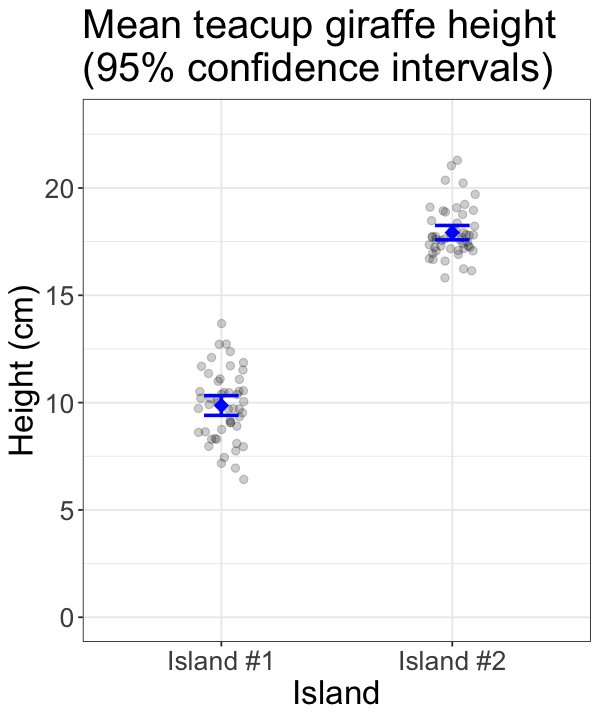

In [48]:
# mean + se + df + t_start + ci 
teacups_mean_heights <- teacups %>% 
  group_by(island) %>% 
  summarise(mean = mean(height),
              n = n(),
              se = sd(height) / sqrt(n()),
              df = n - 1,
              t_star = qt(0.975, df),
              lower = mean - t_star * se,
              upper = mean + t_star * se)


# jitter + error bar plot
options(repr.plot.width = 5, repr.plot.height = 6) 
ggplot(teacups, aes(x = island, y = height)) +
    geom_jitter(width = 0.1, size = 2, alpha = 0.2) +
    stat_summary(data = teacups_mean_heights, 
                 aes(x = island, y = mean),
                 geom = "point", shape = 18, 
                 size = 4, color = "blue") +
    geom_errorbar(data = teacups_mean_heights,
                  mapping = aes(x = island, 
                                y = mean,
                                ymin = lower, 
                                ymax = upper), 
                  width = 0.15, colour = "blue", size = 1) + 
    ylim(c(0, 23)) +
    ylab("Height (cm)") +
    xlab("Island") +
    theme_bw() +
    theme(text = element_text(size=20)) +
    ggtitle("Mean teacup giraffe height \n(95% confidence intervals)")


teacups_mean_heights

**2) summary table**

In [49]:
summary <- teacups %>% 
    group_by(island) %>% 
    summarize(mean = mean(height),
             sd = sd(height),
             n = n())

summary

`summarise()` ungrouping output (override with `.groups` argument)



island,mean,sd,n
<chr>,<dbl>,<dbl>,<int>
Island #1,9.86576,1.618670,50
Island #2,17.91862,1.178544,50


**3) test statistic `t`**

In [50]:
sp <- sqrt((((summary$sd[1])^2) * (summary$n[1] - 1) + ((summary$sd[2])^2) * (summary$n[2] - 1)) / (summary$n[1] + summary$n[2] - 2))

sp

[1] 1.415814

In [51]:
tstat <- (summary$mean[1] - summary$mean[2]) / (sp * sqrt(1/summary$n[1] + 1/summary$n[2]))

tstat

[1] -28.43896

**4) Where is our threshold for rejecting $H_0$ on this distribution?**


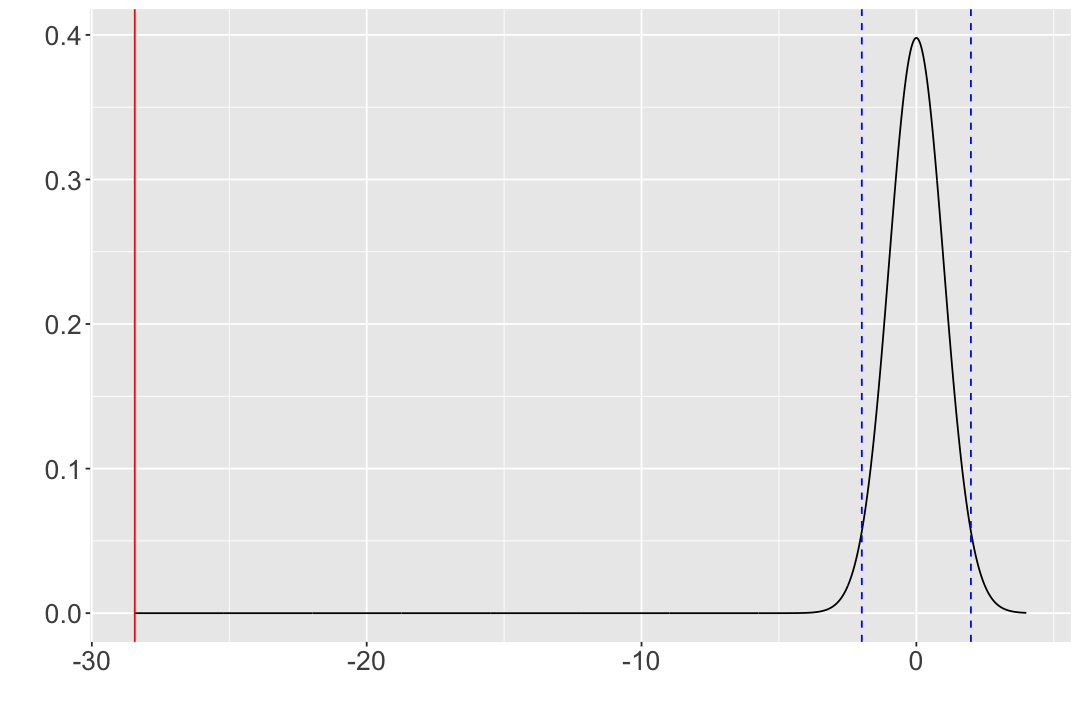

In [53]:
options(repr.plot.width = 9, repr.plot.height = 6)

degrees_freedom <- (summary$n[1] - 1) + (summary$n[2] - 1)


ggplot(data = data.frame(x = c(-4, 4)), aes(x)) +
  stat_function(fun = dt, n = 1000, args = list(df = degrees_freedom)) +
  theme(text = element_text(size = 20)) +
  ylab("") + xlab("") + 
  geom_vline(xintercept = c(qt(0.025, df = degrees_freedom), 
                            qt(0.975, df = degrees_freedom)), 
                     color = "blue", lty = 2) +
  geom_vline(xintercept = tstat, color = "red")

**5)  p-value**

In [54]:
pvalue <- pt(-abs(tstat), df = 98) + 
        pt(abs(tstat), df = 98, lower.tail = FALSE)


p_value

estimate,statistic,p.value,parameter,conf.low,conf.high,method,alternative
<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<chr>,<chr>
0.74,0.5833333,0.4450087,1,0.6409778,0.8202573,1-sample proportions test with continuity correction,two.sided


### 3.2. `t.test`

In [55]:
teacups_ttest <- t.test(height ~ island, 
        data = teacups, 
        var.equal = TRUE) %>% 
    tidy()


teacups_ttest

estimate,estimate1,estimate2,statistic,p.value,parameter,conf.low,conf.high,method,alternative
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
-8.052856,9.86576,17.91862,-28.43896,3.820707e-49,98,-8.614783,-7.490928,Two Sample t-test,two.sided


### Example 2

> if the mean body mass (in grams) of Pygoscelis antarctica is different from the mean body mass (in grams) of Pygoscelis adeliae.

$H_0$: $\mu_{body \; mass_{P. \; antarctica}} = \mu_{body \; mass_{P. \; adeliae}}$
 
$H_A$: $\mu_{body \; mass_{P. \; antarctica}} \ne \mu_{body \; mass_{P. \; adeliae}}$

The test statistic, we are using is: 
$$t=\frac{\bar{X}_1 -\bar{X}_2 } {s_p\sqrt{\frac{2}{n}}}$$

In [60]:
selected_penguins <- penguins %>% 
  select(species, body_mass_g) %>% 
  drop_na()

two_penguins <- selected_penguins %>% 
  filter(species %in% c("Adelie", "Chinstrap")) %>% 
  mutate(species = fct_drop(species))


penguins_ttest <- t.test(formula = body_mass_g ~ species,  
                         data = two_penguins,
                         correct = FALSE,                         
                         var.equal = TRUE, 
                         alternative = c("two.sided")) %>% 
    tidy() 

penguins_ttest

estimate,estimate1,estimate2,statistic,p.value,parameter,conf.low,conf.high,method,alternative
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
-32.42598,3700.662,3733.088,-0.5080869,0.6119085,217,-158.2119,93.35996,Two Sample t-test,two.sided
